# Marvel Character Dialogue Analysis
This notebook analyzes dialogue patterns between heroes and villains in Marvel movies, with a focus on handling skewed dialogue ratios.

In [4]:
%pip install pandas numpy textblob matplotlib seaborn nltk

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Import required libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set simpler plotting styles
plt.style.use('default')
sns.set_theme(style="whitegrid")  # This is more reliable than setting palette

In [6]:
def load_dialogue(file_path):
    """Load dialogue from file and split into lines"""
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
    # Split into individual lines and clean
    lines = [line.strip() for line in text.split('\n') if line.strip()]
    return lines

def preprocess_line(line):
    """Clean and preprocess a single line of dialogue"""
    # Remove stage directions (text in parentheses)
    line = re.sub(r'\(.*?\)', '', line)
    # Remove character names and colons (e.g., "Character:")
    line = re.sub(r'^[A-Za-z\s]+:', '', line)
    # Remove extra whitespace
    line = ' '.join(line.split())
    return line.strip()

## Sentiment Analysis
Let's create functions to analyze the sentiment of dialogues.

In [7]:
def analyze_sentiment(lines):
    """Analyze sentiment for a list of dialogue lines"""
    sentiments = []
    for line in lines:
        if line:
            blob = TextBlob(line)
            sentiments.append({
                'text': line,
                'polarity': blob.sentiment.polarity,
                'subjectivity': blob.sentiment.subjectivity
            })
    return pd.DataFrame(sentiments)

def plot_sentiment_distribution(hero_sentiments, villain_sentiments, title):
    """Plot sentiment distribution comparison"""
    plt.figure(figsize=(12, 6))
    
    sns.kdeplot(data=hero_sentiments['polarity'], label='Hero', fill=True, alpha=0.3)
    sns.kdeplot(data=villain_sentiments['polarity'], label='Villain', fill=True, alpha=0.3)
    
    plt.title(f'Sentiment Distribution: {title}')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

Number of hero lines: 107
Number of villain lines: 85
Ratio of hero to villain lines: 1.26


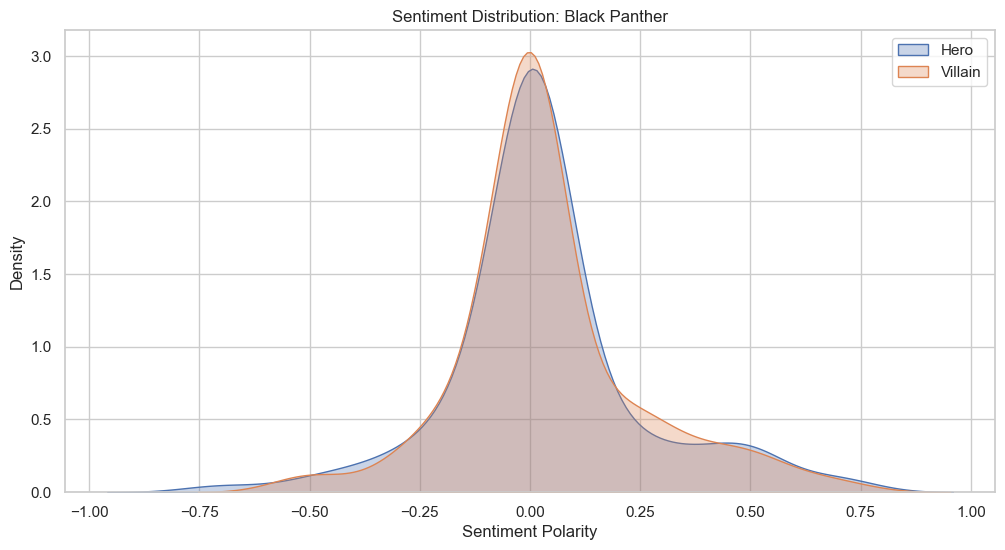

In [ ]:
# Load dialogues
villain_lines = load_dialogue('the-dark-knight-2008_dialogues/joker_dialogues.txt')
hero_lines = load_dialogue('the-dark-knight-2008_dialogues/wayne_dialogues.txt')

# Preprocess lines
hero_lines = [preprocess_line(line) for line in hero_lines]
villain_lines = [preprocess_line(line) for line in villain_lines]

# Print basic statistics
print(f"Number of hero lines: {len(hero_lines)}")
print(f"Number of villain lines: {len(villain_lines)}")
print(f"Ratio of hero to villain lines: {len(hero_lines)/len(villain_lines):.2f}")

# Perform sentiment analysis
hero_sentiments = analyze_sentiment(hero_lines)
villain_sentiments = analyze_sentiment(villain_lines)

# Plot sentiment distributions
plot_sentiment_distribution(hero_sentiments, villain_sentiments, "Black Panther")

In [10]:
def analyze_themes(lines):
    """Analyze thematic elements in dialogue"""
    themes = {
        'power': r'\b(power|control|rule|throne|king|weapon)\b',
        'violence': r'\b(kill|fight|war|dead|death|blood)\b',
        'identity': r'\b(people|wakanda|nation|ancestors|heritage)\b',
        'emotion': r'\b(feel|want|need|love|hate)\b',
        'moral': r'\b(right|wrong|justice|fair|truth)\b',
        'revolution': r'\b(revolution|change|freedom|oppression|liberation)\b'
    }
    
    results = {}
    text = ' '.join(lines).lower()
    
    for theme, pattern in themes.items():
        matches = len(re.findall(pattern, text))
        # Normalize by number of lines
        results[theme] = matches / len(lines)
    
    return results

def plot_theme_comparison(hero_themes, villain_themes):
    """Plot theme comparison between hero and villain"""
    themes = list(hero_themes.keys())
    hero_values = list(hero_themes.values())
    villain_values = list(villain_themes.values())
    
    x = np.arange(len(themes))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(x - width/2, hero_values, width, label='Hero')
    ax.bar(x + width/2, villain_values, width, label='Villain')
    
    ax.set_ylabel('Frequency per Line')
    ax.set_title('Thematic Analysis: Hero vs Villain')
    ax.set_xticks(x)
    ax.set_xticklabels(themes, rotation=45)
    ax.legend()
    
    plt.tight_layout()
    plt.show()

## Thematic Analysis
Analyze thematic elements in dialogue (power, violence, identity, etc.)

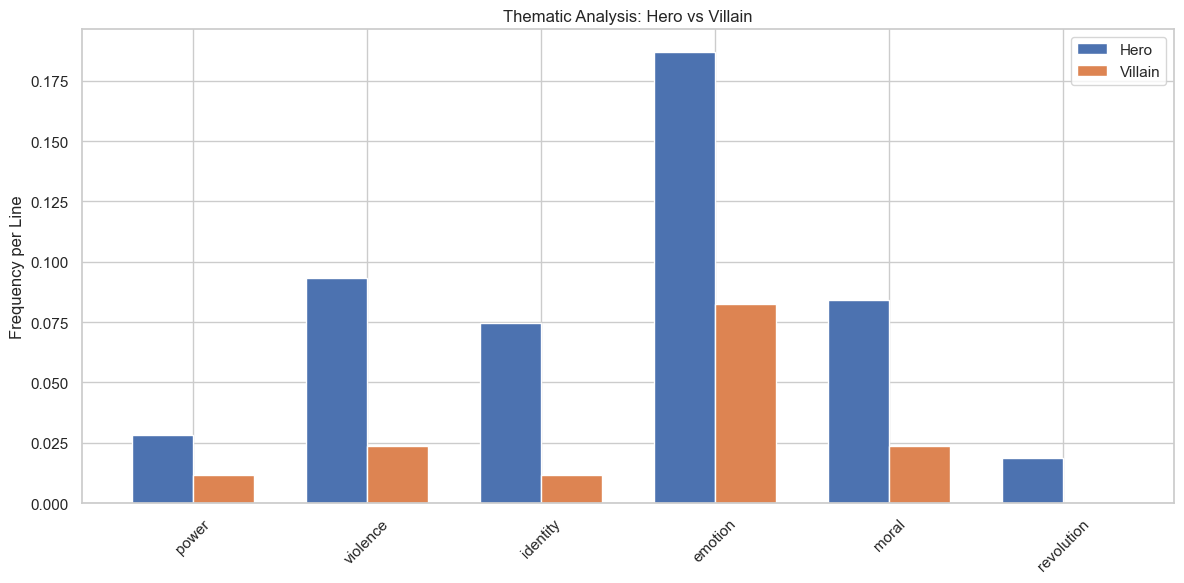


Detailed Theme Frequencies:

Hero Themes:
power: 0.028
violence: 0.093
identity: 0.075
emotion: 0.187
moral: 0.084
revolution: 0.019

Villain Themes:
power: 0.012
violence: 0.024
identity: 0.012
emotion: 0.082
moral: 0.024
revolution: 0.000


In [11]:
# Perform thematic analysis
hero_themes = analyze_themes(hero_lines)
villain_themes = analyze_themes(villain_lines)

# Plot theme comparison
plot_theme_comparison(hero_themes, villain_themes)

# Print detailed theme frequencies
print("\nDetailed Theme Frequencies:")
print("\nHero Themes:")
for theme, freq in hero_themes.items():
    print(f"{theme}: {freq:.3f}")

print("\nVillain Themes:")
for theme, freq in villain_themes.items():
    print(f"{theme}: {freq:.3f}")

## Linguistic Style Analysis
Analyze patterns in language use, including formality, questions, exclamations, etc.

In [14]:
def analyze_linguistic_style(lines):
    """Analyze linguistic style markers"""
    text = ' '.join(lines)
    
    # Define style markers
    markers = {
        'questions': len(re.findall(r'\?', text)) / len(lines),
        'exclamations': len(re.findall(r'!', text)) / len(lines),
        'avg_words_per_line': np.mean([len(line.split()) for line in lines])
    }
    
    return markers

def plot_style_comparison(hero_style, villain_style):
    """Plot linguistic style comparison"""
    markers = list(hero_style.keys())
    hero_values = list(hero_style.values())
    villain_values = list(villain_style.values())
    
    x = np.arange(len(markers))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(x - width/2, hero_values, width, label='Hero')
    ax.bar(x + width/2, villain_values, width, label='Villain')
    
    ax.set_ylabel('Frequency')
    ax.set_title('Linguistic Style Analysis')
    ax.set_xticks(x)
    ax.set_xticklabels(markers, rotation=45)
    ax.legend()
    
    plt.tight_layout()
    plt.show()

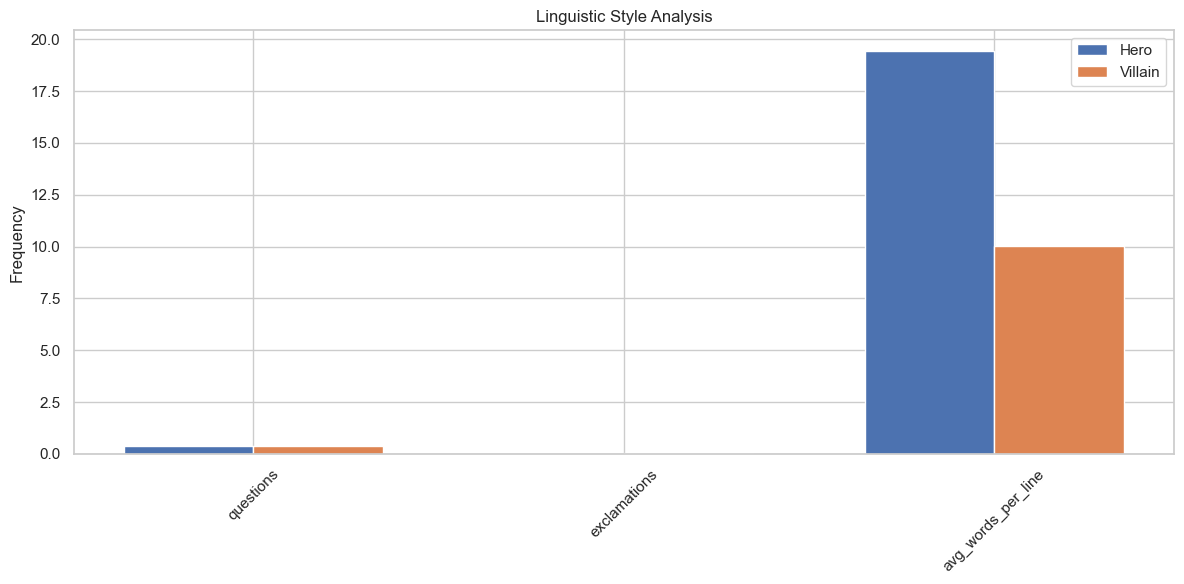


Detailed Style Markers:

Hero Style:
questions: 0.374
exclamations: 0.019
avg_words_per_line: 19.458

Villain Style:
questions: 0.365
exclamations: 0.047
avg_words_per_line: 10.035


In [15]:
# Analyze linguistic styles
hero_style = analyze_linguistic_style(hero_lines)
villain_style = analyze_linguistic_style(villain_lines)

# Plot style comparison
plot_style_comparison(hero_style, villain_style)

# Print detailed style markers
print("\nDetailed Style Markers:")
print("\nHero Style:")
for marker, value in hero_style.items():
    print(f"{marker}: {value:.3f}")

print("\nVillain Style:")
for marker, value in villain_style.items():
    print(f"{marker}: {value:.3f}")

In [16]:
def perform_statistical_analysis(hero_sentiments, villain_sentiments):
    """Perform statistical tests on sentiment differences"""
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(hero_sentiments['polarity'], 
                                     villain_sentiments['polarity'])
    
    # Calculate effect size (Cohen's d)
    d = (hero_sentiments['polarity'].mean() - villain_sentiments['polarity'].mean()) / \
        np.sqrt((hero_sentiments['polarity'].var() + villain_sentiments['polarity'].var()) / 2)
    
    print("Statistical Analysis Results:")
    print(f"T-statistic: {t_stat:.3f}")
    print(f"P-value: {p_value:.3f}")
    print(f"Effect size (Cohen's d): {d:.3f}")
    
    # Print means and standard deviations
    print("\nSentiment Summary:")
    print(f"Hero mean sentiment: {hero_sentiments['polarity'].mean():.3f} ± {hero_sentiments['polarity'].std():.3f}")
    print(f"Villain mean sentiment: {villain_sentiments['polarity'].mean():.3f} ± {villain_sentiments['polarity'].std():.3f}")
    
    return t_stat, p_value, d

# Run statistical analysis
stats_results = perform_statistical_analysis(hero_sentiments, villain_sentiments)

Statistical Analysis Results:
T-statistic: -0.168
P-value: 0.867
Effect size (Cohen's d): -0.024

Sentiment Summary:
Hero mean sentiment: 0.033 ± 0.220
Villain mean sentiment: 0.039 ± 0.205


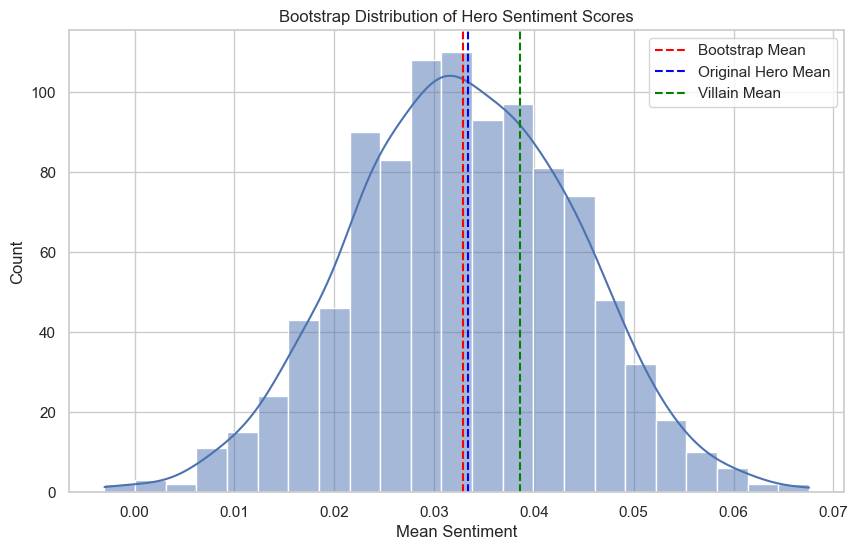

95% Bootstrap CI: (0.011, 0.054)


In [17]:
def bootstrap_analysis(longer_lines, shorter_lines, n_iterations=1000):
    """Perform bootstrap analysis to handle length differences"""
    shorter_len = len(shorter_lines)
    results = []
    
    for _ in range(n_iterations):
        # Sample from longer text to match shorter length
        sampled_lines = np.random.choice(longer_lines, size=shorter_len, replace=False)
        sample_sentiments = analyze_sentiment(sampled_lines)
        results.append(sample_sentiments['polarity'].mean())
    
    return results

# Perform bootstrap analysis
bootstrap_results = bootstrap_analysis(hero_lines, villain_lines)

# Plot bootstrap results
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_results, kde=True)
plt.axvline(np.mean(bootstrap_results), color='red', linestyle='--', label='Bootstrap Mean')
plt.axvline(hero_sentiments['polarity'].mean(), color='blue', linestyle='--', label='Original Hero Mean')
plt.axvline(villain_sentiments['polarity'].mean(), color='green', linestyle='--', label='Villain Mean')
plt.title('Bootstrap Distribution of Hero Sentiment Scores')
plt.xlabel('Mean Sentiment')
plt.ylabel('Count')
plt.legend()
plt.show()

# Print bootstrap confidence intervals
print(f"95% Bootstrap CI: ({np.percentile(bootstrap_results, 2.5):.3f}, {np.percentile(bootstrap_results, 97.5):.3f})")

## Final Summary Visualization
Create a comprehensive visualization dashboard of our findings

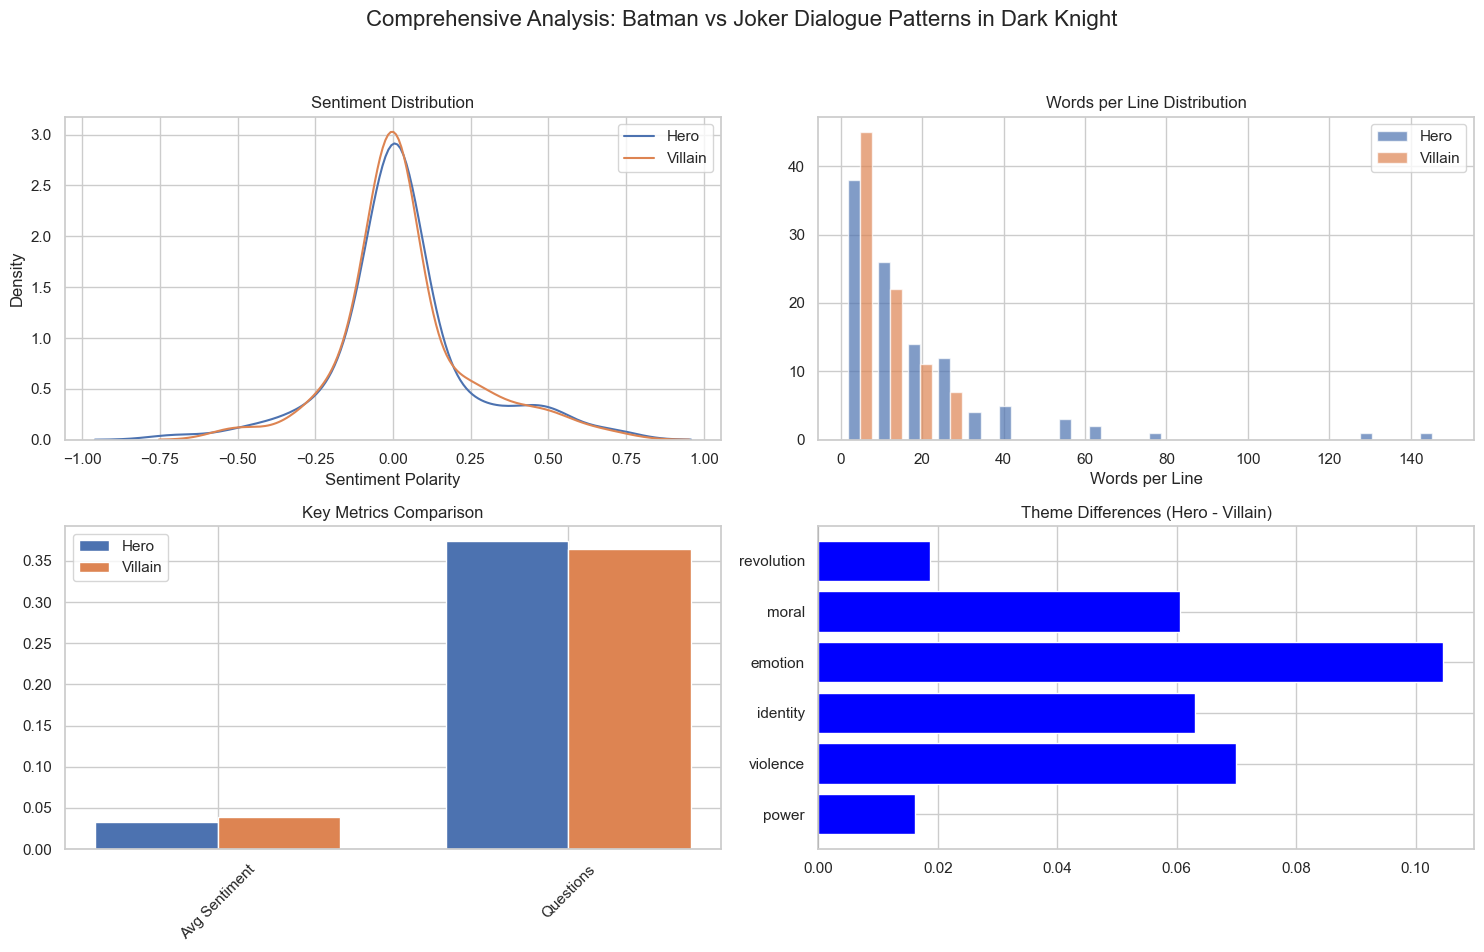


Key Findings Summary:
--------------------------------------------------
1. Dialogue Count: Hero (107) vs Villain (85)
2. Average Sentiment: Hero (0.033) vs Villain (0.039)
3. Statistical Significance: p-value = 0.867

Most Distinctive Themes:
- emotion: 0.105 difference
- violence: 0.070 difference
- identity: 0.063 difference


In [20]:
# Create a figure with subplots for all our key metrics
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Comprehensive Analysis: Batman vs Joker Dialogue Patterns in Dark Knight', fontsize=16)

# 1. Sentiment Distribution (top left)
ax1 = plt.subplot(221)
sns.kdeplot(data=hero_sentiments['polarity'], label='Hero', ax=ax1)
sns.kdeplot(data=villain_sentiments['polarity'], label='Villain', ax=ax1)
ax1.set_title('Sentiment Distribution')
ax1.set_xlabel('Sentiment Polarity')
ax1.legend()

# 2. Word Count Distribution (top right)
ax2 = plt.subplot(222)
hero_words_per_line = [len(line.split()) for line in hero_lines]
villain_words_per_line = [len(line.split()) for line in villain_lines]
ax2.hist([hero_words_per_line, villain_words_per_line], label=['Hero', 'Villain'], 
         alpha=0.7, bins=20)
ax2.set_title('Words per Line Distribution')
ax2.set_xlabel('Words per Line')
ax2.legend()

# 3. Key Metrics Bar Chart (bottom left)
ax3 = plt.subplot(223)
metrics = {
    'Avg Sentiment': [hero_sentiments['polarity'].mean(), villain_sentiments['polarity'].mean()],
    'Questions': [hero_style['questions'], villain_style['questions']]
}

x = np.arange(len(metrics))
width = 0.35
ax3.bar(x - width/2, [metrics[m][0] for m in metrics], width, label='Hero')
ax3.bar(x + width/2, [metrics[m][1] for m in metrics], width, label='Villain')
ax3.set_xticks(x)
ax3.set_xticklabels(metrics.keys(), rotation=45)
ax3.set_title('Key Metrics Comparison')
ax3.legend()

# 4. Theme Comparison (bottom right)
ax4 = plt.subplot(224)
theme_diff = {k: hero_themes[k] - villain_themes[k] for k in hero_themes.keys()}
colors = ['red' if x < 0 else 'blue' for x in theme_diff.values()]
ax4.barh(list(theme_diff.keys()), list(theme_diff.values()), color=colors)
ax4.set_title('Theme Differences (Hero - Villain)')
ax4.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Print summary statistics
print("\nKey Findings Summary:")
print("-" * 50)
print(f"1. Dialogue Count: Hero ({len(hero_lines)}) vs Villain ({len(villain_lines)})")
print(f"2. Average Sentiment: Hero ({hero_sentiments['polarity'].mean():.3f}) vs Villain ({villain_sentiments['polarity'].mean():.3f})")
print(f"3. Statistical Significance: p-value = {stats_results[1]:.3f}")
print("\nMost Distinctive Themes:")
theme_differences = {k: abs(hero_themes[k] - villain_themes[k]) for k in hero_themes.keys()}
top_themes = sorted(theme_differences.items(), key=lambda x: x[1], reverse=True)[:3]
for theme, diff in top_themes:
    print(f"- {theme}: {diff:.3f} difference")

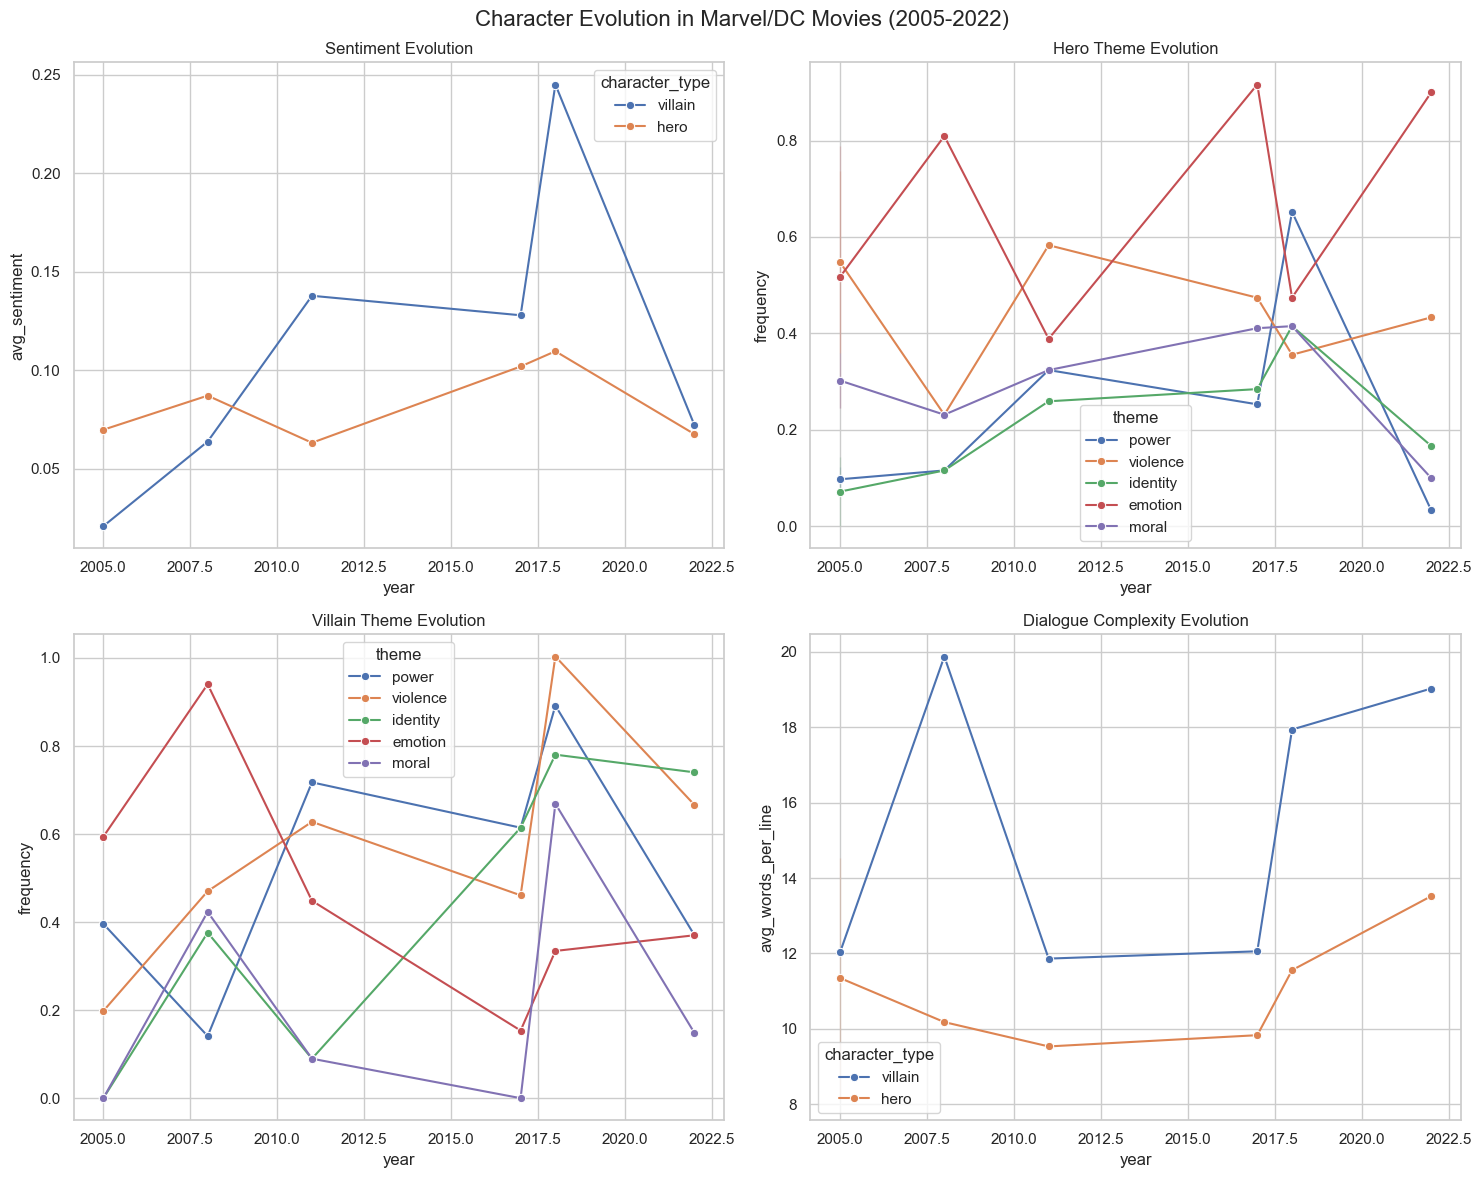


Temporal Evolution Summary:
                    avg_sentiment        avg_words_per_line      
                             mean    std               mean   std
year character_type                                              
2005 hero                   0.070  0.006             11.347  4.51
     villain                0.021    NaN             12.024   NaN
2008 hero                   0.087    NaN             10.176   NaN
     villain                0.064    NaN             19.879   NaN
2011 hero                   0.063    NaN              9.531   NaN
     villain                0.138    NaN             11.862   NaN
2017 hero                   0.102    NaN              9.829   NaN
     villain                0.128    NaN             12.056   NaN
2018 hero                   0.110    NaN             11.555   NaN
     villain                0.245    NaN             17.940   NaN
2022 hero                   0.068    NaN             13.518   NaN
     villain                0.072    NaN       

In [24]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_theme(style="whitegrid")

def extract_year_from_folder(folder_name):
    """Extract year from folder name pattern movie-name-YYYY_dialogues"""
    match = re.search(r'-(\d{4})_', folder_name)
    return int(match.group(1)) if match else None

def categorize_character(filename):
    """
    Categorize character as hero or villain based on filename
    Example patterns:
    Heroes: wayne, thor, tchalla, miles, shuri
    Villains: 'joker', 'killmonger', 'loki', 'crane', 'kingpin', 'spot', 'hela', 'namor'
    """
    villain_patterns = ['joker', 'killmonger', 'loki', 'crane', 'kingpin', 'spot', 'hela', 'namor']
    file_lower = filename.lower()
    
    for pattern in villain_patterns:
        if pattern in file_lower:
            return 'villain'
    return 'hero'

def load_dialogues(base_path):
    """
    Load all dialogue files from nested folder structure
    Returns a DataFrame with dialogue info including year and character type
    """
    data = []
    
    # Walk through all folders
    for root, dirs, files in os.walk(base_path):
        # Only process .txt files
        for file in files:
            if file.endswith('.txt'):
                # Get movie folder name
                movie_folder = os.path.basename(root)
                year = extract_year_from_folder(movie_folder)
                
                if year:  # Only process if we could extract a year
                    file_path = os.path.join(root, file)
                    with open(file_path, 'r', encoding='utf-8') as f:
                        lines = [line.strip() for line in f.readlines() if line.strip()]
                    
                    # Get character type
                    character_type = categorize_character(file)
                    character_name = file.replace('_dialogues.txt', '')
                    movie_name = movie_folder.replace('_dialogues', '')
                    
                    data.append({
                        'year': year,
                        'movie': movie_name,
                        'character': character_name,
                        'character_type': character_type,
                        'lines': lines
                    })
    
    return pd.DataFrame(data)

def analyze_dialogue(lines):
    """Analyze dialogue lines with normalized metrics"""
    text = ' '.join(lines)
    total_words = len(text.split())
    sentiment = TextBlob(text).sentiment
    
    # Normalize themes by total word count instead of line count
    themes = {
        'power': r'\b(power|control|rule|throne|king|weapon)\b',
        'violence': r'\b(kill|fight|war|dead|death|blood)\b',
        'identity': r'\b(people|nation|ancestors|heritage)\b',
        'emotion': r'\b(feel|want|need|love|hate)\b',
        'moral': r'\b(right|wrong|justice|fair|truth)\b'
    }
    
    theme_counts = {}
    text_lower = text.lower()
    for theme, pattern in themes.items():
        matches = len(re.findall(pattern, text_lower))
        # Normalize by total words instead of number of lines
        theme_counts[f'theme_{theme}'] = (matches / total_words) * 100  # Per 100 words
    
    return {
        'total_words': total_words,
        'num_lines': len(lines),
        'avg_sentiment': sentiment.polarity,
        'subjectivity': sentiment.subjectivity,
        'avg_words_per_line': total_words / len(lines),
        **theme_counts
    }

def analyze_temporal_trends(base_path):
    """Analyze trends over time"""
    # Load all dialogues
    df = load_dialogues(base_path)
    
    # Analyze each character's dialogue
    results = []
    for _, row in df.iterrows():
        analysis = analyze_dialogue(row['lines'])
        results.append({
            'year': row['year'],
            'movie': row['movie'],
            'character': row['character'],
            'character_type': row['character_type'],
            **analysis
        })
    
    return pd.DataFrame(results)

def plot_trends(df):
    """Plot temporal trends"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Character Evolution in Marvel/DC Movies (2005-2022)', fontsize=16)
    
    # Sentiment trends
    sns.lineplot(data=df, x='year', y='avg_sentiment', hue='character_type', 
                ax=axes[0,0], marker='o')
    axes[0,0].set_title('Sentiment Evolution')
    
    # Theme evolution by character type
    theme_cols = [col for col in df.columns if col.startswith('theme_')]
    theme_data = df.melt(id_vars=['year', 'character_type'], 
                        value_vars=theme_cols, 
                        var_name='theme', value_name='frequency')
    theme_data['theme'] = theme_data['theme'].str.replace('theme_', '')
    
    # Heroes themes
    sns.lineplot(data=theme_data[theme_data['character_type']=='hero'], 
                x='year', y='frequency', hue='theme', ax=axes[0,1], marker='o')
    axes[0,1].set_title('Hero Theme Evolution')
    
    # Villains themes
    sns.lineplot(data=theme_data[theme_data['character_type']=='villain'], 
                x='year', y='frequency', hue='theme', ax=axes[1,0], marker='o')
    axes[1,0].set_title('Villain Theme Evolution')
    
    # Dialogue complexity
    sns.lineplot(data=df, x='year', y='avg_words_per_line', hue='character_type', 
                ax=axes[1,1], marker='o')
    axes[1,1].set_title('Dialogue Complexity Evolution')
    
    plt.tight_layout()

    plt.savefig('character_evolution_trends.png', 
                dpi=300,  # High resolution
                bbox_inches='tight',  # Prevent label cutoff
                pad_inches=0.5)  # Add padding

    plt.show()
    
    # Print summary statistics
    print("\nTemporal Evolution Summary:")
    summary = df.groupby(['year', 'character_type']).agg({
        'avg_sentiment': ['mean', 'std'],
        'avg_words_per_line': ['mean', 'std']
    }).round(3)
    print(summary)

# Run the analysis
# Replace 'your_path' with the path to your main dialogue folder
df = analyze_temporal_trends('.')  # Use '.' if you're running from the same directory
plot_trends(df)

In [29]:
def perform_collocation_analysis(lines, window_size=5):
    """
    Analyze collocations in dialogue
    window_size: how many words to look before/after the target word
    """
    from collections import Counter
    import math
    
    # Tokenize text
    words = [re.sub(r'[^a-zA-Z]', '', word.lower()) for line in lines 
             for word in line.split() if re.sub(r'[^a-zA-Z]', '', word)]
    
    # Count individual words and pairs
    word_count = Counter(words)
    pairs = Counter()
    
    # Build word pairs within window
    for i in range(len(words)):
        for j in range(1, window_size + 1):
            if i + j < len(words):
                pair = (words[i], words[i + j])
                pairs[pair] += 1
    
    # Calculate MI scores
    collocations = {}
    total_words = len(words)
    
    for (word1, word2), pair_count in pairs.items():
        expected = (word_count[word1] * word_count[word2]) / total_words
        if expected > 0:
            mi_score = math.log2(pair_count / expected)
            collocations[(word1, word2)] = {
                'count': pair_count,
                'mi_score': mi_score,
                't_score': (pair_count - expected) / math.sqrt(pair_count)
            }
    
    return collocations

# Example usage
hero_collocations = perform_collocation_analysis(hero_lines)
villain_collocations = perform_collocation_analysis(villain_lines)

# Get top collocations (by MI score)
top_collocations = sorted(hero_collocations.items(), 
                         key=lambda x: x[1]['mi_score'], 
                         reverse=True)[:20]

# Print top collocations
print("Top Collocations:")
for (word1, word2), data in top_collocations:
    print(f"{word1} {word2}: {data['mi_score']:.3f}")



Top Collocations:
simply makes: 11.021
simply stranger: 11.021
makes stranger: 11.021
jokes trick: 11.021
trick pencil: 11.021
trick disappear: 11.021
pencil disappear: 11.021
bought year: 11.021
bought ago: 11.021
year ago: 11.021
year lawyers: 11.021
ago lawyers: 11.021
lawyers dare: 11.021
lawyers cross: 11.021
dare cross: 11.021
cross happened: 11.021
happened balls: 11.021
happened drop: 11.021
balls drop: 11.021
holding group: 11.021
